<a href="https://colab.research.google.com/github/ShafaqMandha/Unicorn-companies-Analysis/blob/main/Unicorn_Companies_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# Define the file path for the uploaded CSV
file_path = "https://decodingdatascience.com/wp-content/uploads/2023/02/Unicorn_Companies.csv"

print(f"--- Unicorn Companies Data Analysis ---")
print(f"This script analyzes the dataset from: '{file_path}' to answer key questions about unicorn companies.")
print(f"Plots will be displayed in separate windows. Please close each plot to proceed with the analysis.\n")

--- Unicorn Companies Data Analysis ---
This script analyzes the dataset from: 'https://decodingdatascience.com/wp-content/uploads/2023/02/Unicorn_Companies.csv' to answer key questions about unicorn companies.
Plots will be displayed in separate windows. Please close each plot to proceed with the analysis.



In [4]:
# --- Define an Expanded Pink Color Palette for Visuals ---
# Expanded to include more distinct shades for pie charts
pink_palette = {
    'primary': '#FF69B4',  # Hot Pink
    'secondary': '#FFC0CB', # Pink
    'accent1': '#FFB6C1',  # Light Pink
    'accent2': '#DB7093',  # Pale Violet Red
    'accent3': '#E0BBE4',  # Lavender Pink
    'accent4': '#957DAD',  # Muted Purple-Pink
    'accent5': '#D291BC',  # Rosy Pink
    'accent6': '#F7CAC9',  # Dusty Rose
    'accent7': '#F7786B',  # Salmon Pink
    'text_color': '#4B0082', # Indigo for contrast
    'grid_color': '#D3D3D3' # Light gray
}

# Set matplotlib style for better aesthetics
plt.style.use('seaborn-v0_8-darkgrid') # A dark grid style for better contrast with pink
plt.rcParams['axes.facecolor'] = 'white' # Ensure plot background is white for clarity
plt.rcParams['figure.facecolor'] = 'white' # Ensure figure background is white
plt.rcParams['text.color'] = pink_palette['text_color']
plt.rcParams['axes.labelcolor'] = pink_palette['text_color']
plt.rcParams['xtick.color'] = pink_palette['text_color']
plt.rcParams['ytick.color'] = pink_palette['text_color']
plt.rcParams['axes.edgecolor'] = pink_palette['text_color']
plt.rcParams['grid.color'] = pink_palette['grid_color']
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = pink_palette['grid_color']
plt.rcParams['axes.titlecolor'] = pink_palette['text_color']


## **Data Cleaning and Preprocessing**

In [5]:
# --- Data Cleaning and Preprocessing ---
print("--- Section 1: Data Cleaning and Preprocessing ---")
print("Loading the dataset and performing initial cleaning steps to ensure data quality.\n")

try:
    # Pandas can read directly from a URL
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully into a pandas DataFrame.")
except Exception as e:
    print(f"Error: An error occurred while loading the dataset from '{file_path}': {e}")
    print("Please ensure the URL is correct and accessible.")
    exit() # Exit if file not found, as subsequent operations depend on the DataFrame

print("\n--- Initial DataFrame Information ---")
df.info()

print("\n--- Checking for Missing Values Before Cleaning ---")
print(df.isnull().sum().to_string()) # Use to_string for neat table format

# Data types conversion and cleaning
print("\n--- Converting Data Types and Cleaning Values ---")

# 'Valuation ($B)' conversion
def parse_valuation(value):
    if pd.isna(value):
        return np.nan
    s = str(value).strip().replace('$', '').replace(',', '')
    if 'B' in s:
        return float(s.replace('B', '').strip())
    elif 'M' in s:
        return float(s.replace('M', '').strip()) / 1000 # Convert million to billion for consistency
    else:
        try:
            return float(s)
        except ValueError:
            return np.nan

df['Valuation ($B)'] = df['Valuation ($B)'].apply(parse_valuation)
print("- 'Valuation ($B)' column cleaned and converted to numeric (Billions).")

# 'Date Joined' conversion
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')
print("- 'Date Joined' column converted to datetime objects.")

# 'Founded Year' conversion
df['Founded Year'] = pd.to_numeric(df['Founded Year'], errors='coerce')
print("- 'Founded Year' column converted to numeric.")

# 'Total Raised' conversion (assuming it exists and needs similar parsing as Valuation)
if 'Total Raised' in df.columns:
    df['Total Raised ($B)'] = df['Total Raised'].apply(parse_valuation)
    print("- 'Total Raised' column cleaned and converted to numeric (Billions).")
else:
    df['Total Raised ($B)'] = np.nan # Create column with NaN if not present
    print("Warning: 'Total Raised' column not found in the dataset. Correlation analysis will be skipped.")

# 'Portfolio Exits' - Check if this column exists. If it's a count, it needs to be numeric.
if 'Portfolio Exits' in df.columns:
    df['Portfolio Exits'] = pd.to_numeric(df['Portfolio Exits'], errors='coerce').fillna(0) # Fill NaN with 0 for exits
    print("- 'Portfolio Exits' column converted to numeric, missing values filled with 0.")
else:
    print("Warning: 'Portfolio Exits' column not found in the dataset. 'Most Portfolio Exits' analysis will be skipped.")
    df['Portfolio Exits'] = 0 # Create a dummy column to avoid errors later

print("\n--- Missing Values After Cleaning ---")
print(df.isnull().sum().to_string())
print("\n--- DataFrame Information After Cleaning ---")
df.info()
print("-" * 70 + "\n")

--- Section 1: Data Cleaning and Preprocessing ---
Loading the dataset and performing initial cleaning steps to ensure data quality.

Dataset loaded successfully into a pandas DataFrame.

--- Initial DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            1037 non-null   object 
 1   Valuation ($B)     1037 non-null   object 
 2   Date Joined        1037 non-null   object 
 3   Country            1037 non-null   object 
 4   City               1037 non-null   object 
 5   Industry           1037 non-null   object 
 6   Select Inverstors  1020 non-null   object 
 7   Founded Year       994 non-null    float64
 8   Total Raised       1013 non-null   object 
 9   Financial Stage    49 non-null     object 
 10  Investors Count    1036 non-null   float64
 11  Deal Terms         1008 non-null   flo

## **Answer these Questions**

### 1. Highest Valuation: Which company has the highest valuation in the dataset?

--- Question 1: Highest Valuation ---
Query: Which company has the highest valuation in the dataset?
Answer: The company with the highest valuation is: Bytedance
Valuation: $140.00 Billion



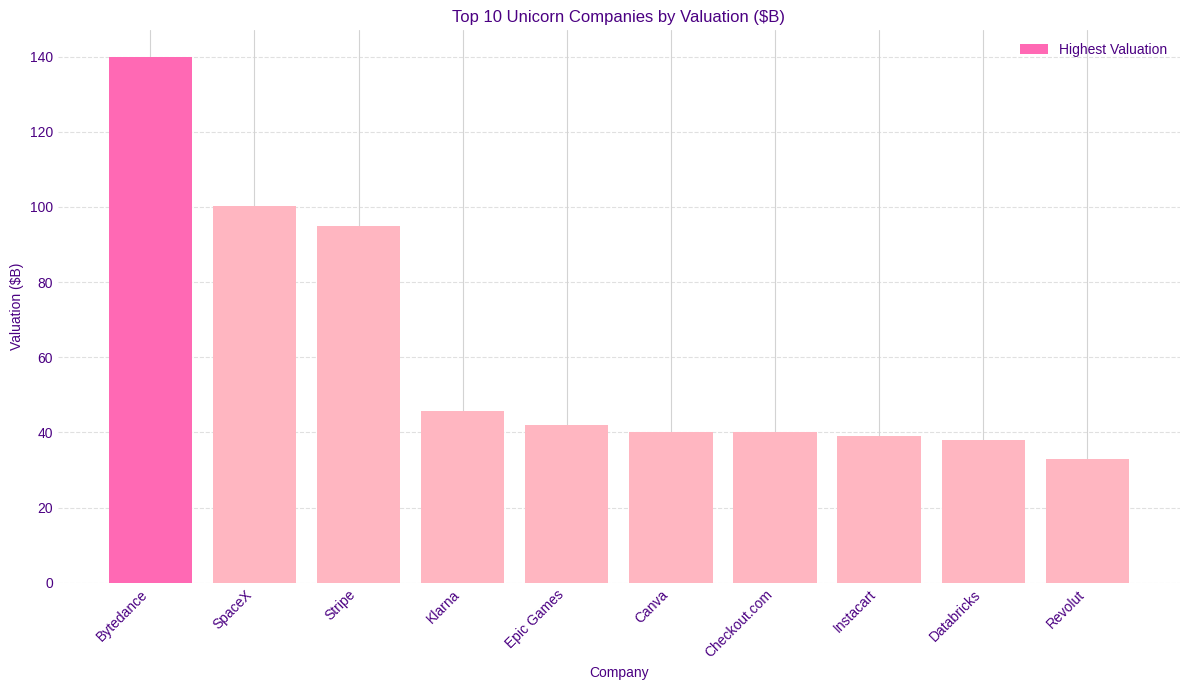

----------------------------------------------------------------------



In [6]:
# 1. Highest Valuation: Which company has the highest valuation in the dataset?
print("--- Question 1: Highest Valuation ---")
print("Query: Which company has the highest valuation in the dataset?")
df_cleaned_valuation = df.dropna(subset=['Valuation ($B)'])
if not df_cleaned_valuation.empty:
    highest_valuation_company = df_cleaned_valuation.loc[df_cleaned_valuation['Valuation ($B)'].idxmax()]
    print(f"Answer: The company with the highest valuation is: {highest_valuation_company['Company']}")
    print(f"Valuation: ${highest_valuation_company['Valuation ($B)']:.2f} Billion\n")

    # Visualization: Top 10 companies by Valuation
    top_10_companies = df_cleaned_valuation.nlargest(10, 'Valuation ($B)')
    plt.figure(figsize=(12, 7))
    bars = plt.bar(top_10_companies['Company'], top_10_companies['Valuation ($B)'], color=pink_palette['accent1'])
    # Highlight the highest valuation company in a different pink shade
    plt.bar(highest_valuation_company['Company'], highest_valuation_company['Valuation ($B)'], color=pink_palette['primary'], label='Highest Valuation')
    plt.xlabel('Company')
    plt.ylabel('Valuation ($B)')
    plt.title('Top 10 Unicorn Companies by Valuation ($B)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Answer: Could not determine the highest valuation company due to missing or invalid valuation data.\n")
print("-" * 70 + "\n")

### 2. Missing 'Founded Year': How many companies do not have a 'Founded Year' recorded in the dataset?

--- Question 2: Missing 'Founded Year' ---
Query: How many companies do not have a 'Founded Year' recorded in the dataset?
Answer: Number of companies without a 'Founded Year' recorded: 43



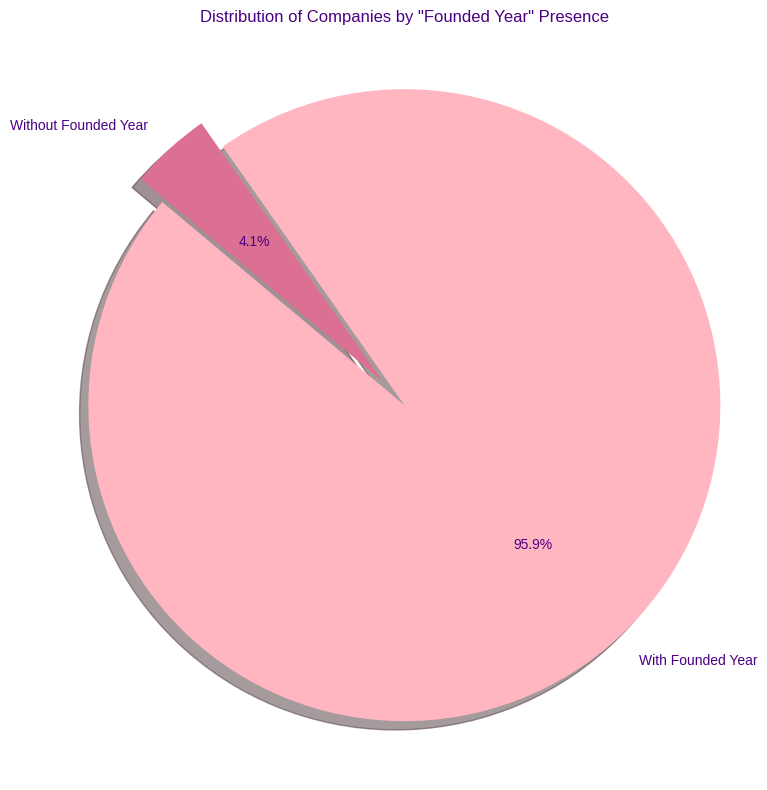

----------------------------------------------------------------------



In [7]:
# 2. Missing 'Founded Year': How many companies do not have a 'Founded Year' recorded in the dataset?
print("--- Question 2: Missing 'Founded Year' ---")
print("Query: How many companies do not have a 'Founded Year' recorded in the dataset?")
missing_founded_year_count = df['Founded Year'].isnull().sum()
print(f"Answer: Number of companies without a 'Founded Year' recorded: {missing_founded_year_count}\n")

# Visualization: Distribution of 'Founded Year' presence
labels = ['With Founded Year', 'Without Founded Year']
sizes = [len(df) - missing_founded_year_count, missing_founded_year_count]
# Using distinct colors from the palette for two categories
colors = [pink_palette['accent1'], pink_palette['accent2']]
explode = (0, 0.1) # explode the 'Without Founded Year' slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Companies by "Founded Year" Presence')
plt.tight_layout()
plt.show()
print("-" * 70 + "\n")

### 3. No Listed Investors: How many companies do not have any investors listed in the 'Select Investors' column?

--- Question 3: No Listed Investors ---
Query: How many companies do not have any investors listed in the 'Select Investors' column?
Answer: Number of companies without any investors listed: 17



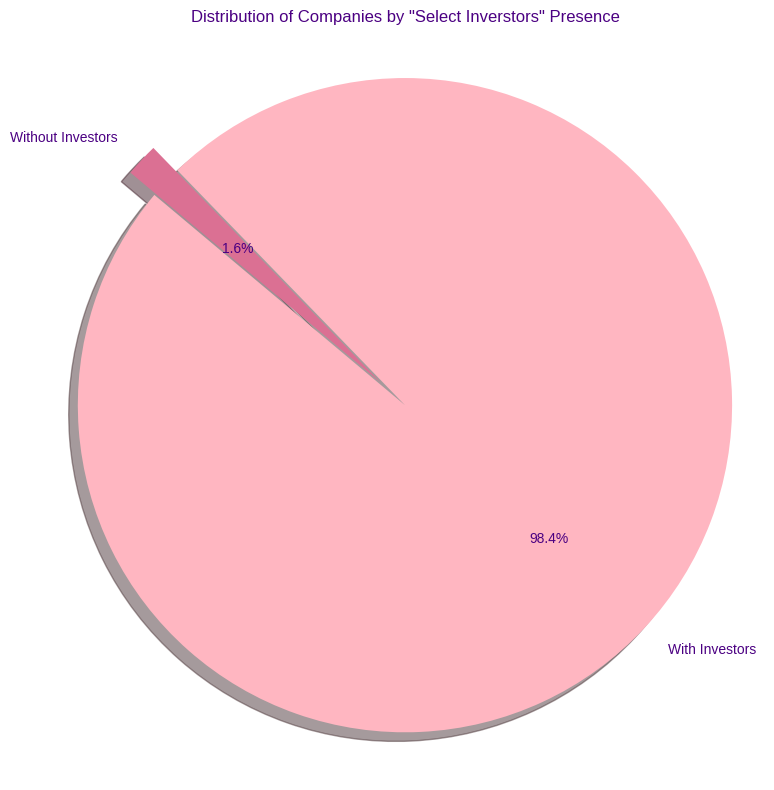

----------------------------------------------------------------------



In [8]:
# 3. No Listed Investors: How many companies do not have any investors listed in the 'Select Investors' column?
print("--- Question 3: No Listed Investors ---")
print("Query: How many companies do not have any investors listed in the 'Select Investors' column?")
# Corrected column name to 'Select Inverstors' based on user provided DataFrame columns
investors_col = 'Select Inverstors'

if investors_col in df.columns:
    no_investors_count = df[investors_col].isnull().sum() + \
                         df[investors_col].astype(str).str.strip().eq('').sum()
    print(f"Answer: Number of companies without any investors listed: {no_investors_count}\n")

    # Visualization: Companies with/without listed investors
    labels = ['With Investors', 'Without Investors']
    sizes = [len(df) - no_investors_count, no_investors_count]
    # Using distinct colors from the palette for two categories
    colors = [pink_palette['accent1'], pink_palette['accent2']]
    explode = (0, 0.1)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.axis('equal')
    plt.title(f'Distribution of Companies by "{investors_col}" Presence')
    plt.tight_layout()
    plt.show()
else:
    print(f"Answer: Cannot answer 'No Listed Investors' as the '{investors_col}' column was not found in the dataset.")
    print("Please ensure the column name for investors is correct in the CSV file.\n")
print("-" * 70 + "\n")

### 4. Most Unicorns by Country: Which country has the highest number of unicorn companies?

--- Question 4: Most Unicorns by Country ---
Query: Which country has the highest number of unicorn companies?
Answer: The country with the highest number of unicorn companies is: United States (536 companies)



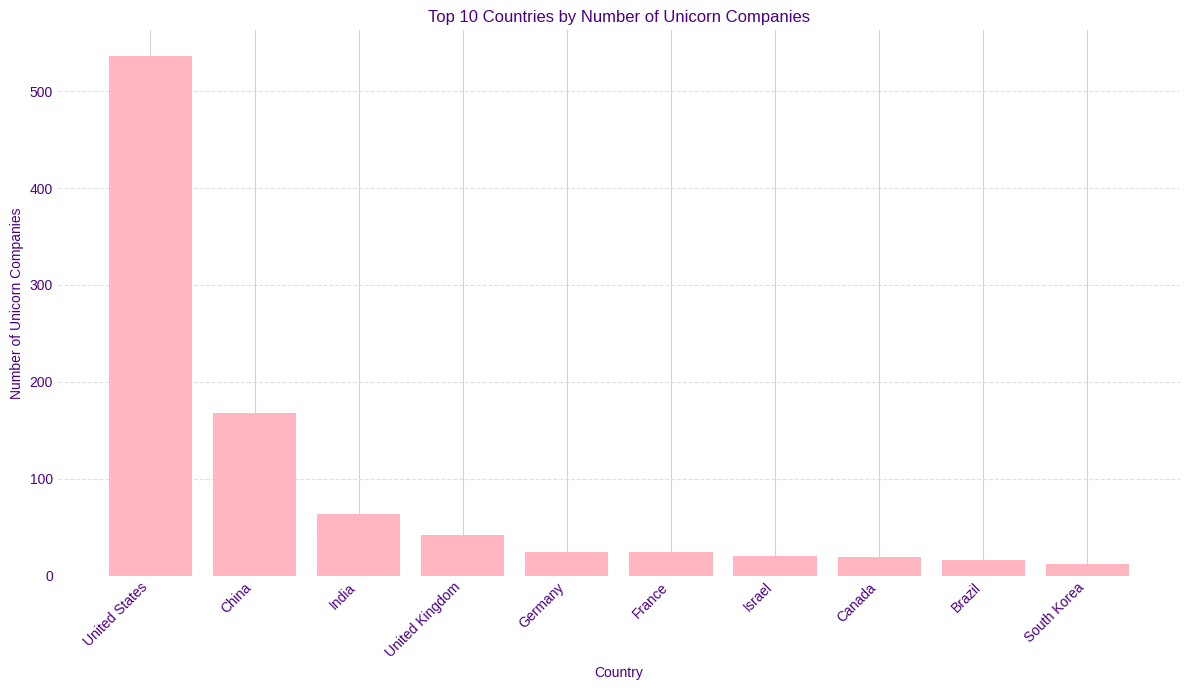

----------------------------------------------------------------------



In [9]:
# 4. Most Unicorns by Country: Which country has the highest number of unicorn companies?
print("--- Question 4: Most Unicorns by Country ---")
print("Query: Which country has the highest number of unicorn companies?")
country_counts = df['Country'].value_counts()
most_unicorns_country = country_counts.index[0]
most_unicorns_count = country_counts.iloc[0]
print(f"Answer: The country with the highest number of unicorn companies is: {most_unicorns_country} ({most_unicorns_count} companies)\n")

# Visualization: Top 10 Countries by Number of Unicorns
top_10_countries = country_counts.head(10)
plt.figure(figsize=(12, 7))
plt.bar(top_10_countries.index, top_10_countries.values, color=pink_palette['accent1'])
plt.xlabel('Country')
plt.ylabel('Number of Unicorn Companies')
plt.title('Top 10 Countries by Number of Unicorn Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("-" * 70 + "\n")

### 5. Founded After 2010: How many companies were founded after the year 2010?

--- Question 5: Founded After 2010 ---
Query: How many companies were founded after the year 2010?
Answer: Number of companies founded after the year 2010: 785



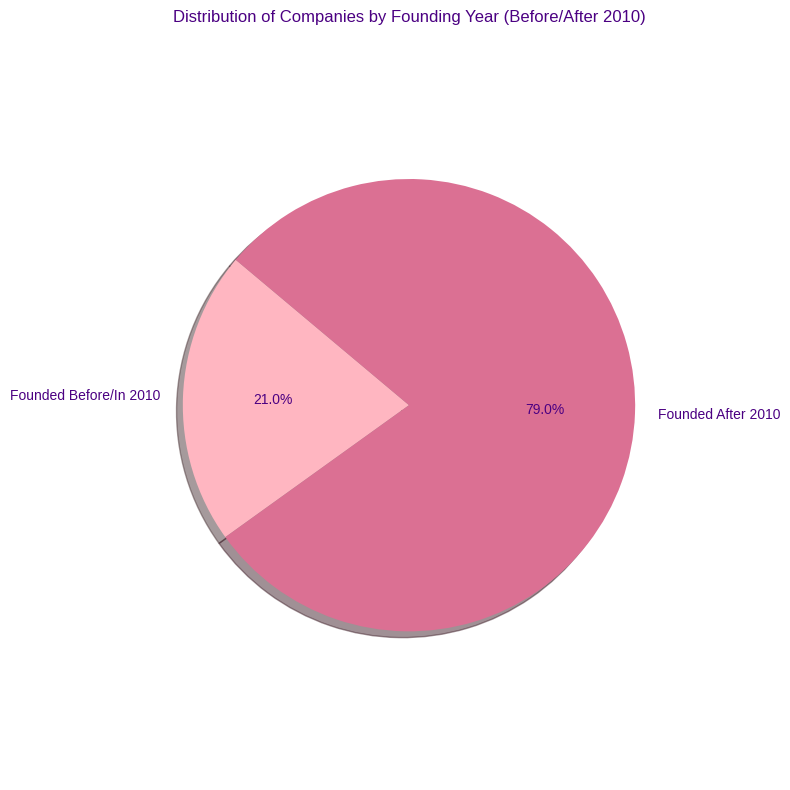

----------------------------------------------------------------------



In [10]:
# 5. Founded After 2010: How many companies were founded after the year 2010?
print("--- Question 5: Founded After 2010 ---")
print("Query: How many companies were founded after the year 2010?")
df_valid_founded_year = df.dropna(subset=['Founded Year'])
companies_founded_after_2010 = df_valid_founded_year[df_valid_founded_year['Founded Year'] > 2010].shape[0]
print(f"Answer: Number of companies founded after the year 2010: {companies_founded_after_2010}\n")

# Visualization: Companies founded before/in 2010 vs. after 2010
founded_before_2010 = df_valid_founded_year[df_valid_founded_year['Founded Year'] <= 2010].shape[0]
labels = ['Founded Before/In 2010', 'Founded After 2010']
sizes = [founded_before_2010, companies_founded_after_2010]
# Using distinct colors from the palette for two categories
colors = [pink_palette['accent1'], pink_palette['accent2']]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Distribution of Companies by Founding Year (Before/After 2010)')
plt.tight_layout()
plt.show()
print("-" * 70 + "\n")

### 6. Average Valuation by Industry: What is the average valuation of unicorn companies in each industry?

--- Question 6: Average Valuation by Industry ---
Query: What is the average valuation of unicorn companies in each industry?
Answer: Average valuation of unicorn companies by industry (in $B):

Industry
Sequoia Capital, Thoma Bravo, Softbank    32.000000
Finttech                                  10.000000
Other                                      4.735714
Artificial intelligence                    4.343521
Fintech                                    3.828390
Kuang-Chi                                  3.500000
Auto & transportation                      3.334483
Data management & analytics                3.313171
Edtech                                     3.241786
Supply chain, logistics, & delivery        3.065965




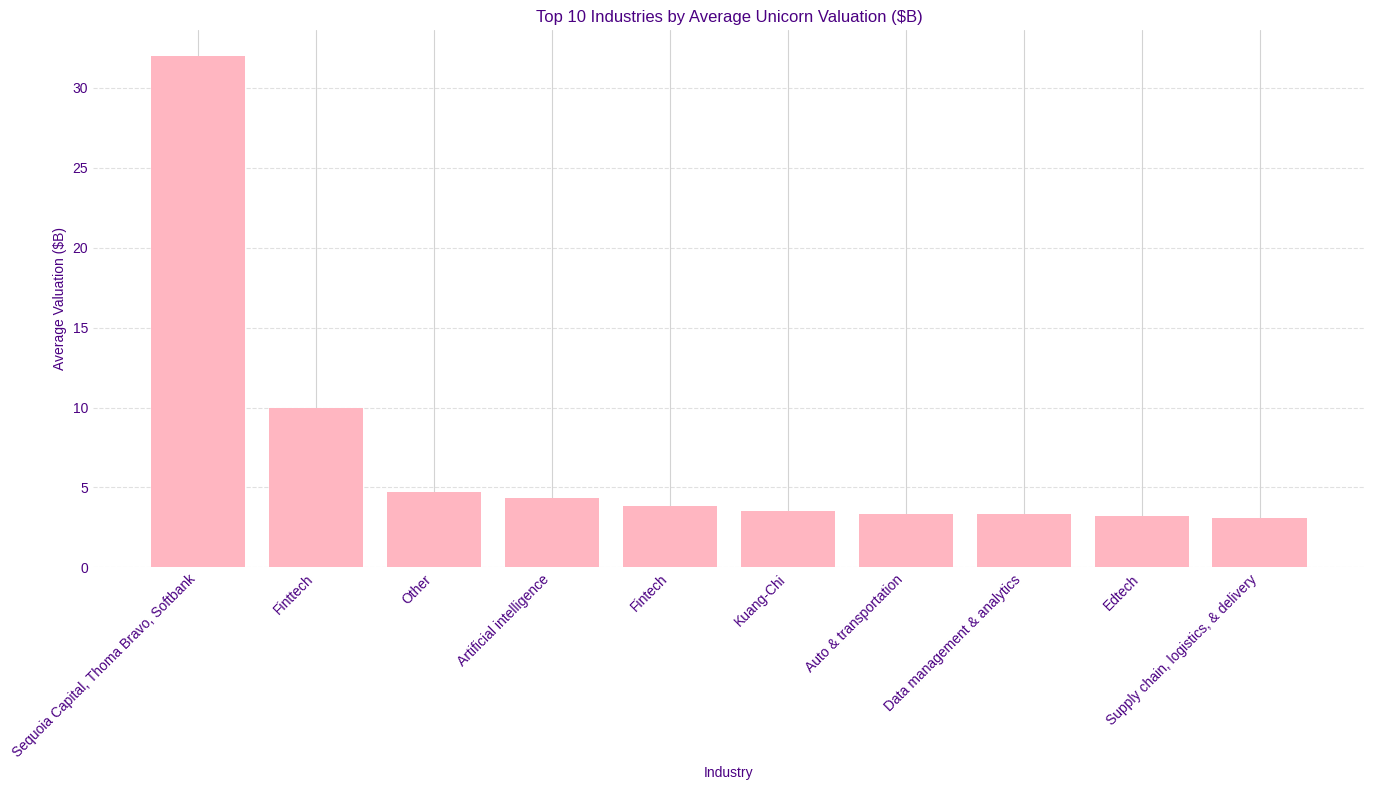

----------------------------------------------------------------------



In [11]:
# 6. Average Valuation by Industry: What is the average valuation of unicorn companies in each industry?
print("--- Question 6: Average Valuation by Industry ---")
print("Query: What is the average valuation of unicorn companies in each industry?")
df_industry_valuation = df.dropna(subset=['Valuation ($B)', 'Industry'])
average_valuation_by_industry = df_industry_valuation.groupby('Industry')['Valuation ($B)'].mean().sort_values(ascending=False)
print("Answer: Average valuation of unicorn companies by industry (in $B):\n")
print(average_valuation_by_industry.head(10).to_string()) # Display top 10 for brevity in table
print("\n")

# Visualization: Average Valuation by Industry (Top 10)
top_10_industries_avg_val = average_valuation_by_industry.head(10)
plt.figure(figsize=(14, 8))
plt.bar(top_10_industries_avg_val.index, top_10_industries_avg_val.values, color=pink_palette['accent1'])
plt.xlabel('Industry')
plt.ylabel('Average Valuation ($B)')
plt.title('Top 10 Industries by Average Unicorn Valuation ($B)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("-" * 70 + "\n")

### 7. Top 5 Cities: Which are the top 5 cities with the highest number of unicorn companies?

--- Question 7: Top 5 Cities ---
Query: Which are the top 5 cities with the highest number of unicorn companies?
Answer: Top 5 cities with the highest number of unicorn companies:

City
San Francisco    145
New York          96
Beijing           63
Shanghai          43
London            33




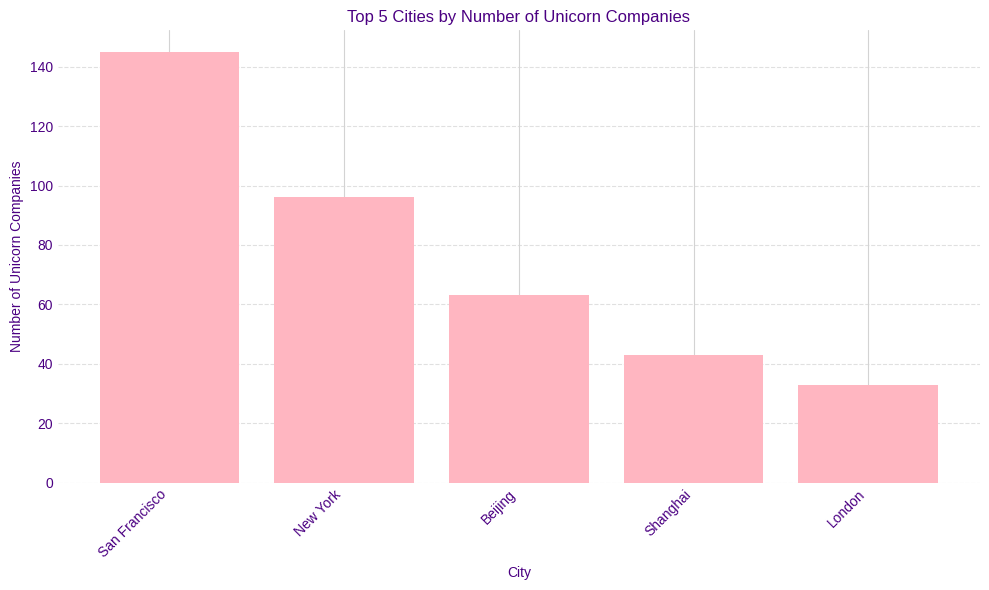

----------------------------------------------------------------------



In [12]:
# 7. Top 5 Cities: Which are the top 5 cities with the highest number of unicorn companies?
print("--- Question 7: Top 5 Cities ---")
print("Query: Which are the top 5 cities with the highest number of unicorn companies?")
city_counts = df['City'].value_counts()
top_5_cities = city_counts.head(5)
print("Answer: Top 5 cities with the highest number of unicorn companies:\n")
print(top_5_cities.to_string())
print("\n")

# Visualization: Top 5 Cities by Number of Unicorns
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities.index, top_5_cities.values, color=pink_palette['accent1'])
plt.xlabel('City')
plt.ylabel('Number of Unicorn Companies')
plt.title('Top 5 Cities by Number of Unicorn Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("-" * 70 + "\n")

### 8. Financial Stage Distribution: What is the distribution of companies across different financial stages?

--- Question 8: Financial Stage Distribution ---
Query: What is the distribution of companies across different financial stages?
Answer: Distribution of companies across different financial stages:

Financial Stage
Acquired       22
Divestiture     8
IPO             7
Acq             7
Asset           1
Take            1
Management      1
Reverse         1
Corporate       1




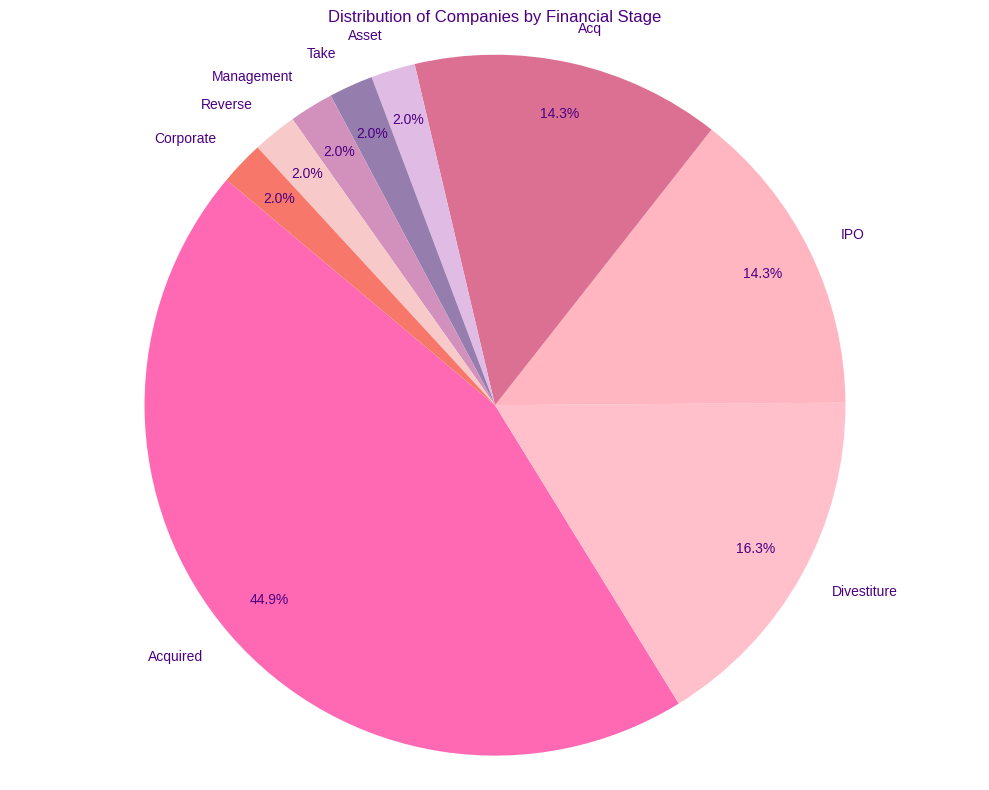

----------------------------------------------------------------------



In [13]:
# 8. Financial Stage Distribution: What is the distribution of companies across different financial stages?
print("--- Question 8: Financial Stage Distribution ---")
print("Query: What is the distribution of companies across different financial stages?")
financial_stage_col = 'Financial Stage' # Assuming this is the column name

if financial_stage_col in df.columns and not df[financial_stage_col].isnull().all():
    financial_stage_distribution = df[financial_stage_col].value_counts()
    print("Answer: Distribution of companies across different financial stages:\n")
    print(financial_stage_distribution.to_string())
    print("\n")

    # Visualization: Financial Stage Distribution
    plt.figure(figsize=(10, 8))
    # Use a cycle of colors from the expanded palette for pie chart slices
    colors_for_pie = [pink_palette['primary'], pink_palette['secondary'], pink_palette['accent1'],
                      pink_palette['accent2'], pink_palette['accent3'], pink_palette['accent4'],
                      pink_palette['accent5'], pink_palette['accent6'], pink_palette['accent7']]
    plt.pie(financial_stage_distribution, labels=financial_stage_distribution.index, autopct='%1.1f%%',
            startangle=140, pctdistance=0.85, colors=colors_for_pie[:len(financial_stage_distribution)])
    plt.axis('equal')
    plt.title('Distribution of Companies by Financial Stage')
    plt.tight_layout()
    plt.show()
else:
    print("Answer: The 'Financial Stage' column is not available or is empty. Using 'Industry' distribution as a proxy instead.\n")
    industry_distribution = df['Industry'].value_counts()
    print("Distribution of companies across different industries (as proxy for Financial Stage):\n")
    print(industry_distribution.head(10).to_string()) # Display top 10 for brevity
    print("\n")

    # Visualization: Industry Distribution (Top 10)
    top_10_industries_dist = industry_distribution.head(10)
    plt.figure(figsize=(12, 8))
    plt.bar(top_10_industries_dist.index, top_10_industries_dist.values, color=pink_palette['accent1'])
    plt.xlabel('Industry')
    plt.ylabel('Number of Companies')
    plt.title('Top 10 Industries by Number of Unicorn Companies (as proxy for Financial Stage)')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
print("-" * 70 + "\n")

### 9. Most Portfolio Exits: Which companies have the most portfolio exits?

--- Question 9: Most Portfolio Exits ---
Query: Which companies have the most portfolio exits?
Answer: Top 5 companies with the most portfolio exits:

   Company  Portfolio Exits
 Bytedance              5.0
  iCarbonX              3.0
    Circle              3.0
Epic Games              2.0
  Lenskart              2.0




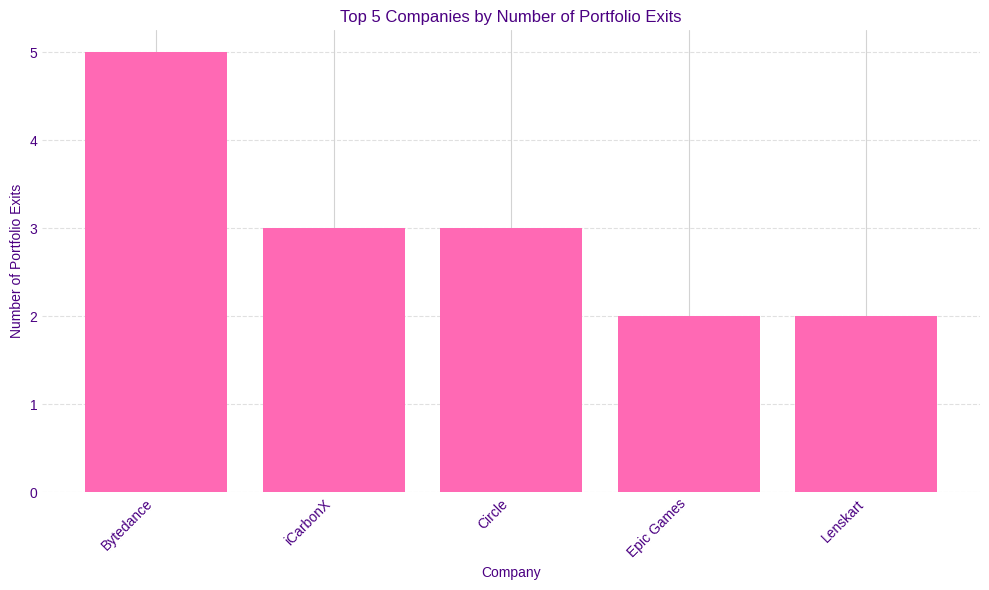

----------------------------------------------------------------------



In [14]:
# 9. Most Portfolio Exits: Which companies have the most portfolio exits?
print("--- Question 9: Most Portfolio Exits ---")
print("Query: Which companies have the most portfolio exits?")
if 'Portfolio Exits' in df.columns and not df['Portfolio Exits'].isnull().all():
    companies_with_exits = df[df['Portfolio Exits'] > 0].sort_values(by='Portfolio Exits', ascending=False)
    if not companies_with_exits.empty:
        top_5_exits = companies_with_exits.head(5)
        print("Answer: Top 5 companies with the most portfolio exits:\n")
        print(top_5_exits[['Company', 'Portfolio Exits']].to_string(index=False)) # Use to_string and no index
        print("\n")

        # Visualization: Top 5 Companies by Portfolio Exits
        plt.figure(figsize=(10, 6))
        plt.bar(top_5_exits['Company'], top_5_exits['Portfolio Exits'], color=pink_palette['primary'])
        plt.xlabel('Company')
        plt.ylabel('Number of Portfolio Exits')
        plt.title('Top 5 Companies by Number of Portfolio Exits')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Answer: No companies found with recorded portfolio exits.\n")
else:
    print("Answer: Cannot answer 'Most Portfolio Exits' as the 'Portfolio Exits' column is not available or is empty.\n")
print("-" * 70 + "\n")

### 10. Valuation and Total Raised Correlation: What is the correlation between 'Valuation ($B)' and 'Total Raised'?

--- Question 10: Valuation and Total Raised Correlation ---
Query: What is the correlation between 'Valuation ($B)' and 'Total Raised'?
Answer: Correlation between Valuation ($B) and Total Raised ($B): 0.62



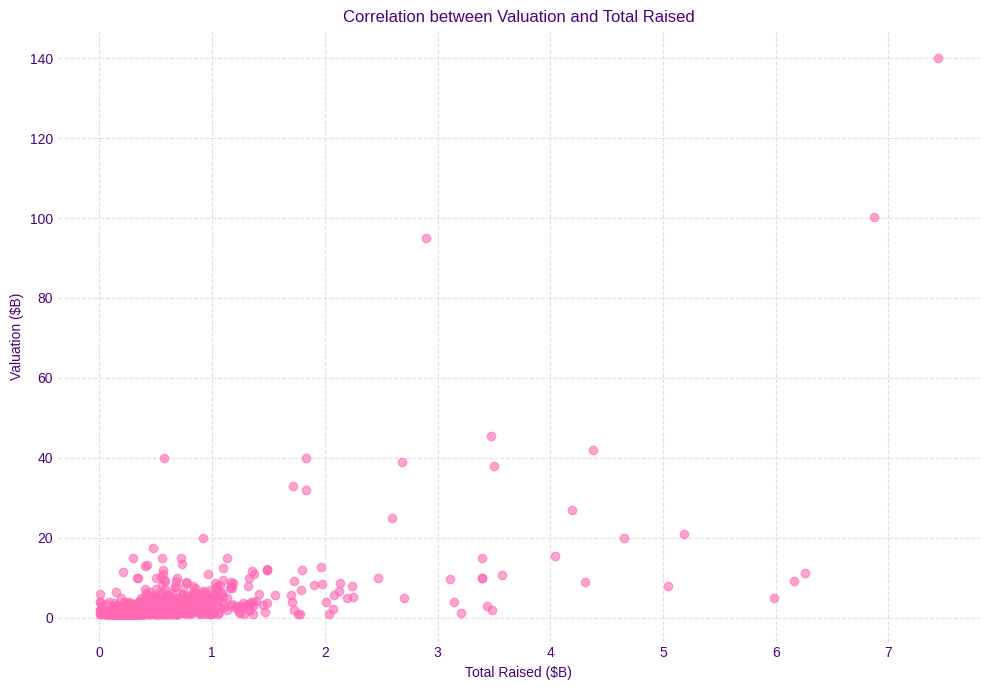

In [15]:
# 10. Valuation and Total Raised Correlation: What is the correlation between 'Valuation ($B)' and 'Total Raised'?
print("--- Question 10: Valuation and Total Raised Correlation ---")
print("Query: What is the correlation between 'Valuation ($B)' and 'Total Raised'?")
if 'Total Raised ($B)' in df.columns and not df['Total Raised ($B)'].isnull().all():
    df_correlation = df.dropna(subset=['Valuation ($B)', 'Total Raised ($B)'])
    if not df_correlation.empty:
        correlation = df_correlation['Valuation ($B)'].corr(df_correlation['Total Raised ($B)'])
        print(f"Answer: Correlation between Valuation ($B) and Total Raised ($B): {correlation:.2f}\n")

        # Visualization: Scatter plot of Valuation vs. Total Raised
        plt.figure(figsize=(10, 7))
        plt.scatter(df_correlation['Total Raised ($B)'], df_correlation['Valuation ($B)'], alpha=0.6, color=pink_palette['primary'])
        plt.xlabel('Total Raised ($B)')
        plt.ylabel('Valuation ($B)')
        plt.title('Correlation between Valuation and Total Raised')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("Answer: Not enough valid data in 'Valuation ($B)' and 'Total Raised ($B)' columns to calculate correlation.\n")
else:
    print("Answer: Cannot calculate correlation as 'Total Raised' column is not available or is empty.\n")

## Analysis Complete

All questions have been answered and corresponding plots displayed.

Thank you for using the Unicorn Companies Data Analysis script!